# Clustering and PCA

### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. The NGO wants to know:

    The categories of countries using some socio-economic and health factors that determine overall development of the country.
    The countries which the CEO needs to focus on the most.

Based on various market surveys, the NGO has gathered a large dataset containing the socio-economic factors of the countries.


### Objectives
Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT. You are also supposed to use dimensionality reduction using PCA to get the visualisations of the clusters in a 2-D form. 

In [184]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [185]:
# Read and Check the data
data = pd.read_csv("country.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [187]:
# Getting idea about the dataset

data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [188]:
# Code to check for duplicates in the country column
country = data["country"]
data[country.isin(country[country.duplicated()])].sort_values("country")
# Since the output is empty or null, it means that there are no duplicate country names or details in the provided dataset.

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [189]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [190]:
# Before calculating the PCs, we copy the values of country column into a new dataframe and then drop that column from the dataset using the code
data = data.drop('country', 1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Standardising Data

**Now we standardise the data for plottings**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [191]:
# Standardising continuous features
df = data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
stan_df=(df-df.mean())/df.std()
data = data.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
data = pd.concat([data,stan_df],axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


### PCA on the data
#### Note - 
- While computng the principal components, since there is no need to divide the original dataset in test and train data, so we apply PCA and calculate PCs on the original daatset itself.

In [192]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [193]:
#Doing the PCA on the data
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [194]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [195]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

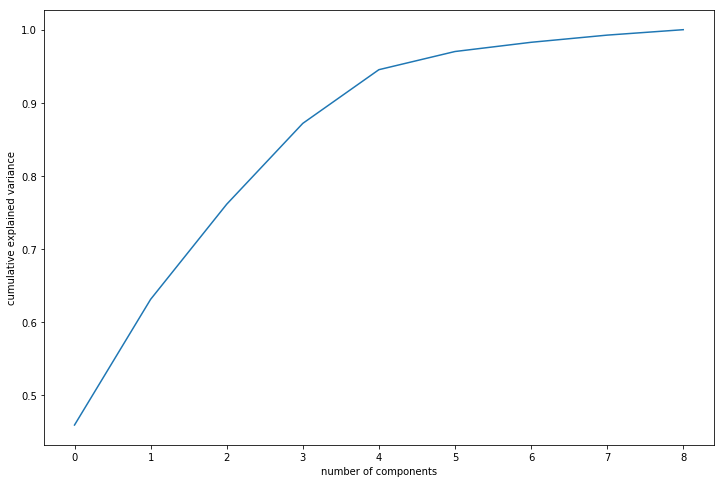

In [196]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe 95% of the variance in the dataset
- We'll choose 4 components for our clustering

In [197]:
colnames = list(data.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


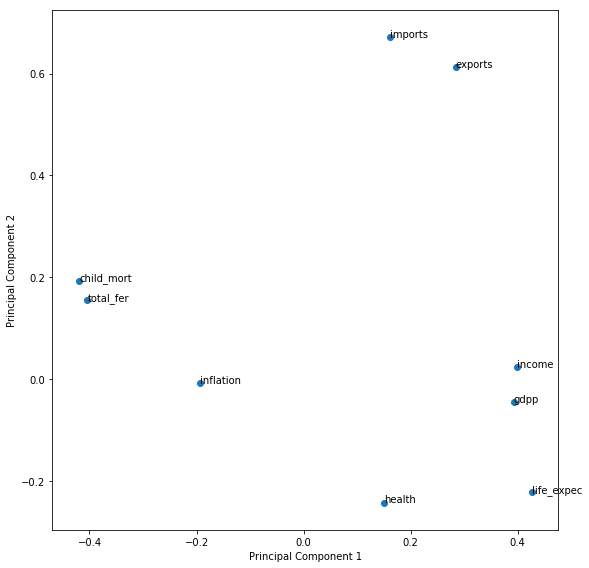

In [198]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [199]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [200]:
df_train_pca = pca_final.fit_transform(data)
df_train_pca.shape

(167, 4)

In [201]:
df_pca = pd.DataFrame(df_train_pca)
df_pca.columns = ['PC1', 'PC2','PC3','PC4']
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


#### Creating correlation matrix for the principal components - we expect little to no correlation

In [202]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

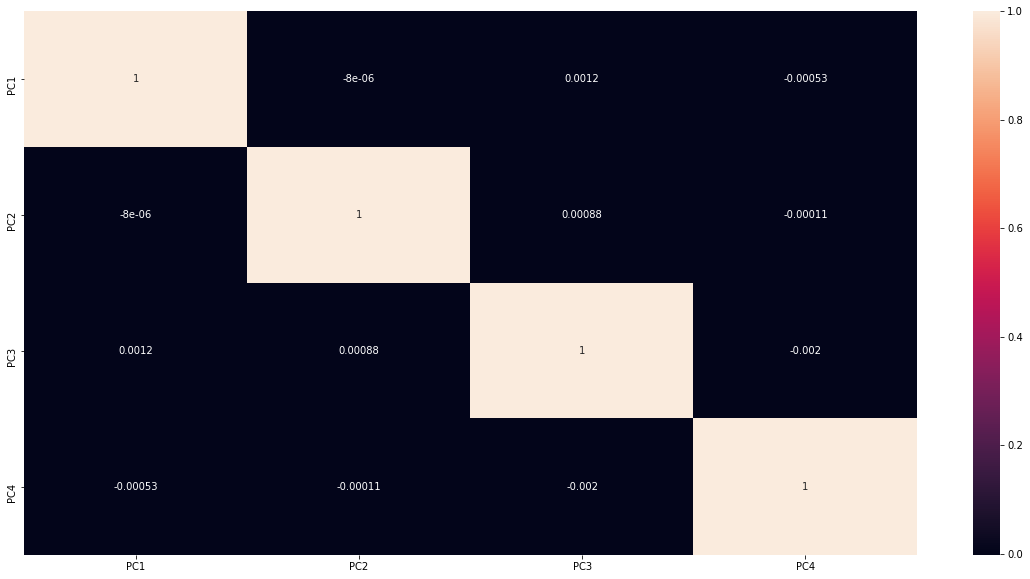

In [203]:
plt.figure(figsize = (20,10))
sns.heatmap(df_pca.corr(),annot = True)

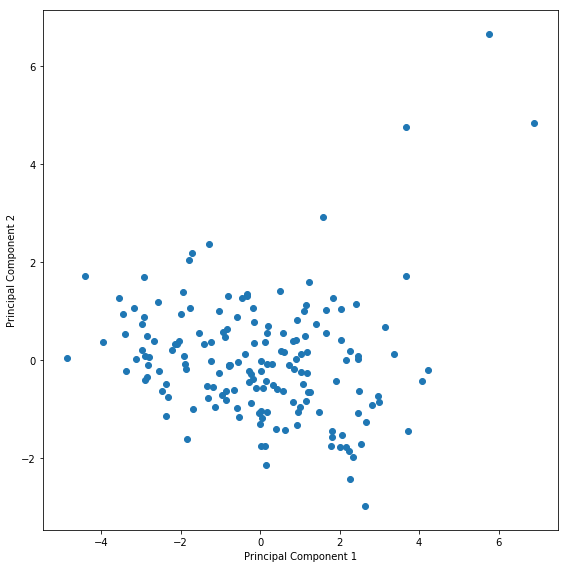

In [204]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [205]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092543056 , min corr:  -0.0020378295355501573


In [206]:
country = pd.DataFrame(country)
country.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [207]:
df_pca = pd.concat([country, df_pca], axis=1)
df_pca.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710
1,Albania,0.428070,-0.586096,0.320090,-1.167681
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578
3,Angola,-2.922180,1.694341,-1.517172,0.873340
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275


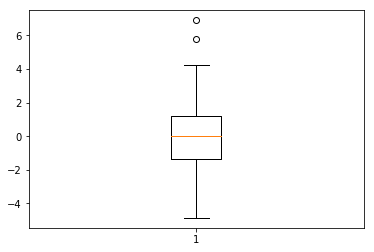

In [208]:
# outlier treatment
plt.boxplot(df_pca.PC1)
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]

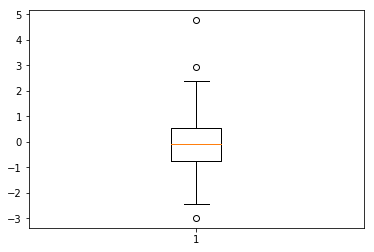

In [209]:
# outlier treatment
plt.boxplot(df_pca.PC2)
Q1 = df_pca.PC2.quantile(0.25)
Q3 = df_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC2 >= Q1 - 1.5*IQR) & (df_pca.PC2 <= Q3 + 1.5*IQR)]

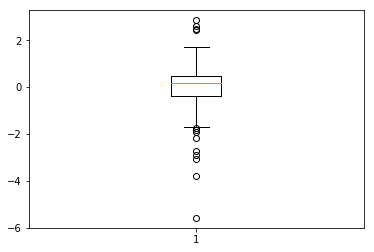

In [210]:
# outlier treatment 
plt.boxplot(df_pca.PC3)
Q1 = df_pca.PC3.quantile(0.25)
Q3 = df_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC3 >= Q1 - 1.5*IQR) & (df_pca.PC3 <= Q3 + 1.5*IQR)]

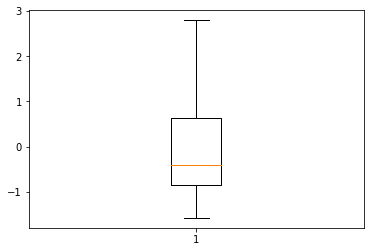

In [211]:
# outlier treatment
plt.boxplot(df_pca.PC4)
Q1 = df_pca.PC4.quantile(0.25)
Q3 = df_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC4 >= Q1 - 1.5*IQR) & (df_pca.PC4 <= Q3 + 1.5*IQR)]

In [212]:
df_pca.shape

(149, 5)

In [213]:
outliers_df = df_pca
country_1 = pd.DataFrame(df_pca["country"])
country_1.shape
outliers_df.head()
# We will be using df_pca 

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710
1,Albania,0.428070,-0.586096,0.320090,-1.167681
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578
3,Angola,-2.922180,1.694341,-1.517172,0.873340
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275


In [214]:
df_pca = df_pca.drop(['country'],1)
df_pca.head()
print(df_pca.shape)

(149, 4)


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [215]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [216]:
hopkins(df_pca)

0.7504293122750917

## K-Means with K = 4

In [217]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [218]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

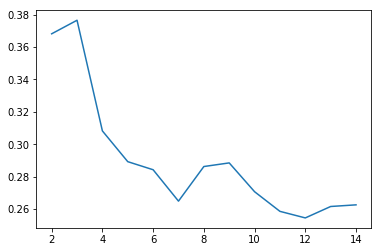

In [219]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

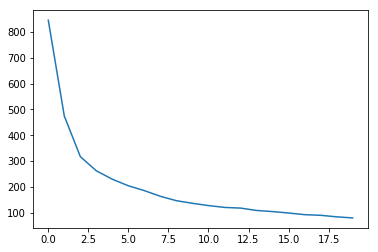

In [220]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

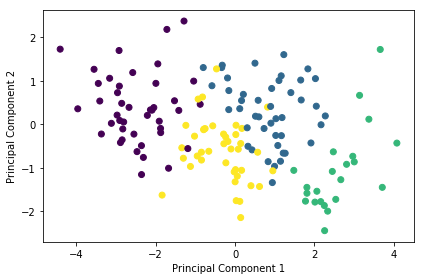

In [221]:
plt.scatter(df_pca['PC1'], df_pca['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

In [222]:
# analysis of clusters formed
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca_km = pd.concat([df_pca, pd.Series(model_clus4.labels_)], axis=1)

In [223]:
df_pca_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
df_pca_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,0
1,0.428070,-0.586096,0.320090,-1.167681,1
2,-0.282140,-0.445318,-1.221462,-0.847578,3
3,-2.922180,1.694341,-1.517172,0.873340,0
4,1.028893,0.130097,0.192344,-0.842275,1


In [224]:
df_pca_km.shape

(149, 5)

In [225]:
df_pca_km = pd.merge(df_pca_km,country_1,on=df_pca_km['PC1'])
df_pca_km.shape

(149, 7)

In [226]:
df_pca_km = df_pca_km.drop('key_0', 1)
df_pca_km.head()

,PC1,PC2,PC3,PC4,ClusterID,country
0,-2.905050,0.088089,0.718841,0.993710,0,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,1,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,3,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,0,Angola
4,1.028893,0.130097,0.192344,-0.842275,1,Antigua and Barbuda


In [227]:
df_country_clusterid1 = pd.merge(df_pca_km,countries_1,on='country',how='inner')
df_country_clusterid1.head()

,PC1,PC2,PC3,PC4,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.905050,0.088089,0.718841,0.993710,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.428070,-0.586096,0.320090,-1.167681,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282140,-0.445318,-1.221462,-0.847578,3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.922180,1.694341,-1.517172,0.873340,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.028893,0.130097,0.192344,-0.842275,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [228]:
df_country_clusterid1.shape

(149, 15)

In [229]:
km_clusters_child_mort = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).gdpp.mean())
km_clusters_PC1 = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = 	pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC4.mean())

In [230]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp,km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,94.061905,29.371667,6.013810,39.623810,3872.214286,10.313929,59.192857,5.067143,1917.500000,-2.462302,0.379137,0.065845,0.644031
1,1,14.613636,51.915909,7.116364,60.679545,14924.318182,4.035636,74.181818,1.968182,9061.045455,0.840642,0.304653,0.424880,-0.762422
2,2,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182,2.581300,-1.082748,0.313695,1.055989
3,3,28.185366,30.014366,5.551463,34.208924,10678.048780,9.441366,71.909756,2.559756,5256.243902,-0.324749,-0.598488,-0.360437,-0.720446


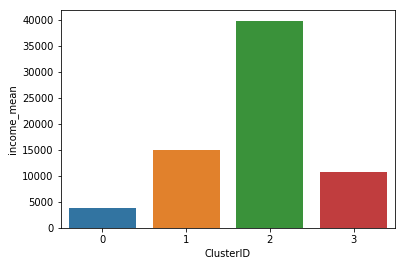

In [231]:
sns.barplot(x=df.ClusterID, y=df.income_mean)

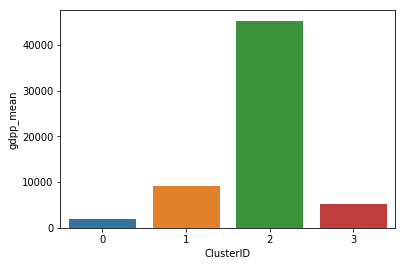

In [232]:
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

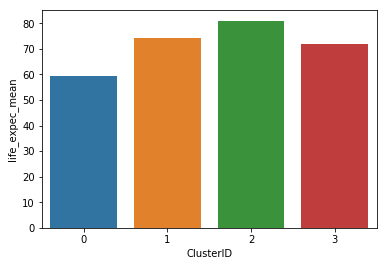

In [233]:
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

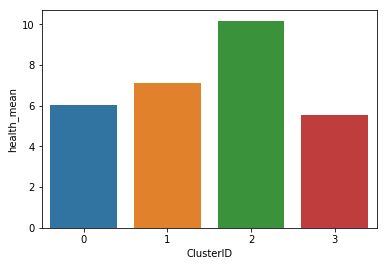

In [234]:
sns.barplot(x=df.ClusterID, y=df.health_mean)

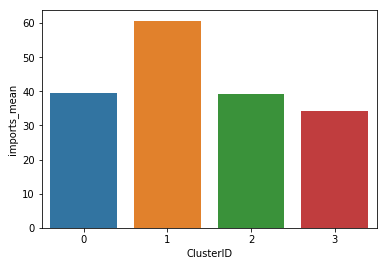

In [235]:
sns.barplot(x=df.ClusterID, y=df.imports_mean)

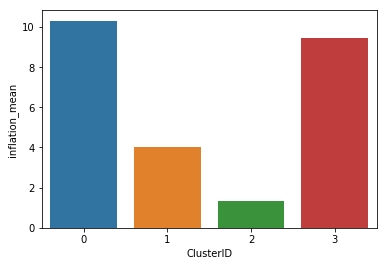

In [236]:
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

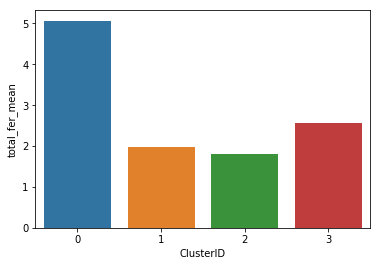

In [237]:
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

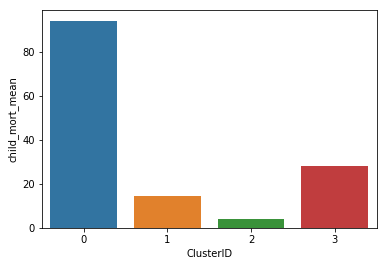

In [238]:
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

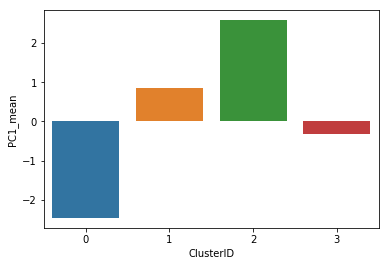

In [239]:
sns.barplot(x=df.ClusterID, y=df.PC1_mean)

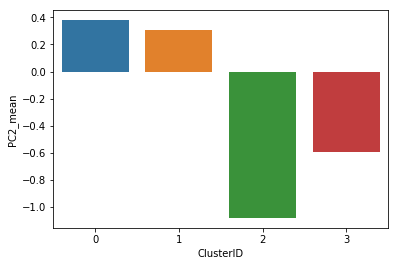

In [240]:
sns.barplot(x=df.ClusterID, y=df.PC2_mean)

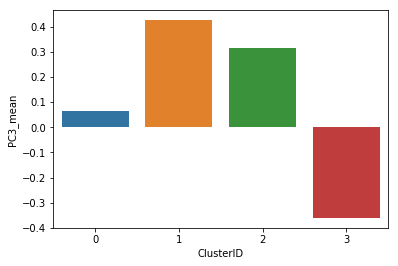

In [241]:
sns.barplot(x=df.ClusterID, y=df.PC3_mean)

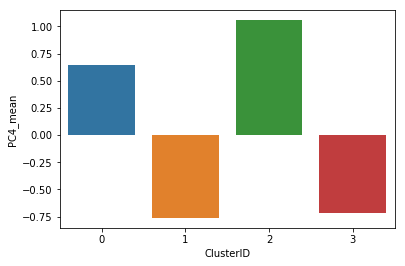

In [242]:
sns.barplot(x=df.ClusterID, y=df.PC4_mean)

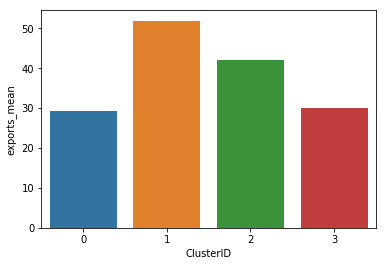

In [243]:
sns.barplot(x=df.ClusterID, y=df.exports_mean)

## K-Means with K = 5

In [244]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

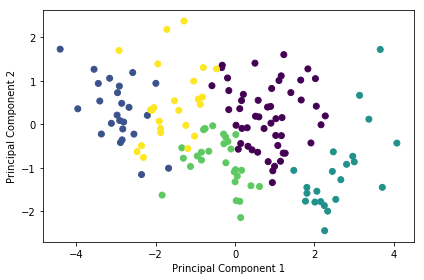

In [245]:
plt.scatter(df_pca['PC1'], df_pca['PC2'],c=model_clus5.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

In [246]:
# analysis of clusters formed
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca_km1 = pd.concat([df_pca, pd.Series(model_clus5.labels_)], axis=1)
df_pca_km1.columns = ['PC1', 'PC2', 'PC3','PC4','ClusterID']

In [247]:
df_pca_km1 = pd.merge(df_pca_km1,country_1,on=df_pca_km1['PC1'])
df_pca_km1.shape

(149, 7)

In [248]:
df_pca_km1 = df_pca_km1.drop('key_0', 1)
df_pca_km1.head()

,PC1,PC2,PC3,PC4,ClusterID,country
0,-2.905050,0.088089,0.718841,0.993710,1,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,0,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,3,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,4,Angola
4,1.028893,0.130097,0.192344,-0.842275,0,Antigua and Barbuda


In [249]:
df_country_clusterid2 = pd.merge(df_pca_km1,countries_1,on='country',how='inner')
df_country_clusterid2.head()

,PC1,PC2,PC3,PC4,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.905050,0.088089,0.718841,0.993710,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.428070,-0.586096,0.320090,-1.167681,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282140,-0.445318,-1.221462,-0.847578,3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.922180,1.694341,-1.517172,0.873340,4,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.028893,0.130097,0.192344,-0.842275,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [250]:
df_country_clusterid2.shape

(149, 15)

In [251]:
km3_clusters_child_mort = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).child_mort.mean())
km3_clusters_exports = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).exports.mean())
km3_clusters_health = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).health.mean())
km3_clusters_imports = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).imports.mean())
km3_clusters_income = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).income.mean())
km3_clusters_inflation = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).inflation.mean())
km3_clusters_life_expec = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).life_expec.mean())
km3_clusters_total_fer = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).total_fer.mean())
km3_clusters_gdpp = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).gdpp.mean())
km3_clusters_PC1 = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).PC1.mean())
km3_clusters_PC2 = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).PC2.mean())
km3_clusters_PC3 = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).PC3.mean())
km3_clusters_PC4 = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).PC4.mean())

In [252]:
df3 = pd.concat([pd.Series([0,1,2,4,5]), km3_clusters_child_mort, km3_clusters_exports, km3_clusters_health,km3_clusters_imports,km3_clusters_income,km3_clusters_inflation,km3_clusters_life_expec,km3_clusters_total_fer,km3_clusters_gdpp,km3_clusters_PC1,km3_clusters_PC2,km3_clusters_PC3,km3_clusters_PC4], axis=1)
df3.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
df3.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,14.606000,50.020000,6.924800,57.844000,15286.200000,4.244360,74.370000,1.946800,9110.320000,0.810928,0.193350,0.331833,-0.780880
1,1,109.170833,23.000833,6.921667,38.754167,1554.708333,8.448125,56.804167,5.590000,770.166667,-2.934288,0.315755,0.476998,1.010878
2,2,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182,2.581300,-1.082748,0.313695,1.055989
3,4,28.744828,25.541000,5.460690,29.395376,10102.413793,9.393310,72.351724,2.514828,4899.586207,-0.399768,-0.837554,-0.413803,-0.757725
4,5,65.216667,39.782917,5.107917,44.245833,6771.250000,12.936250,63.266667,4.164167,3276.625000,-1.594723,0.493083,-0.389876,0.030058


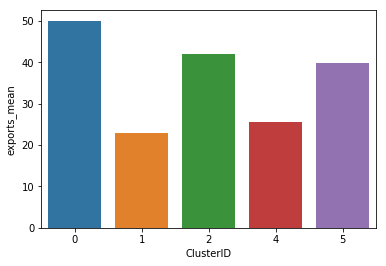

In [253]:
sns.barplot(x=df3.ClusterID, y=df3.exports_mean)

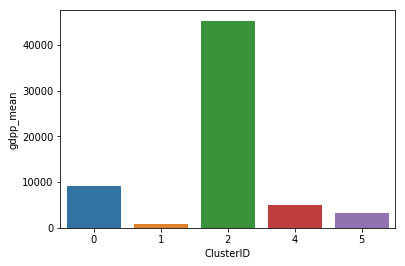

In [254]:
sns.barplot(x=df3.ClusterID, y=df3.gdpp_mean)

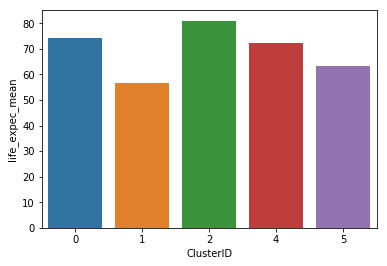

In [255]:
sns.barplot(x=df3.ClusterID, y=df3.life_expec_mean)

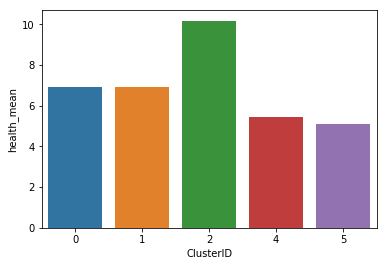

In [256]:
sns.barplot(x=df3.ClusterID, y=df3.health_mean)

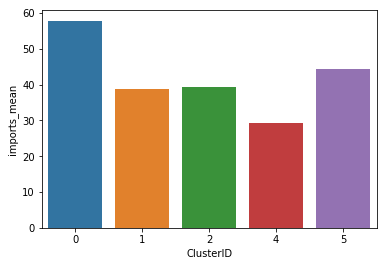

In [257]:
sns.barplot(x=df3.ClusterID, y=df3.imports_mean)

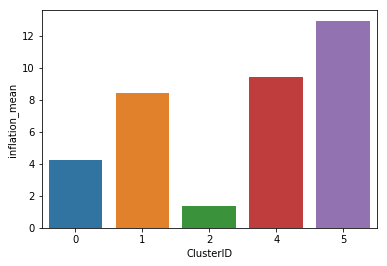

In [258]:
sns.barplot(x=df3.ClusterID, y=df3.inflation_mean)

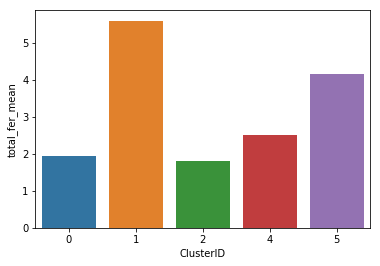

In [259]:
sns.barplot(x=df3.ClusterID, y=df3.total_fer_mean)

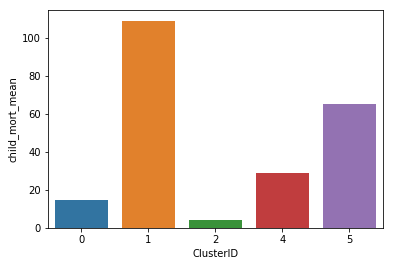

In [260]:
sns.barplot(x=df3.ClusterID, y=df3.child_mort_mean)

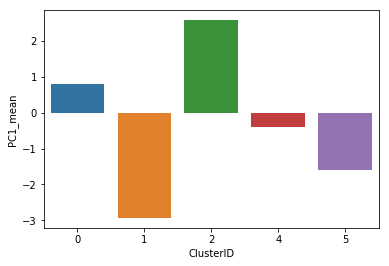

In [261]:
sns.barplot(x=df3.ClusterID, y=df3.PC1_mean)

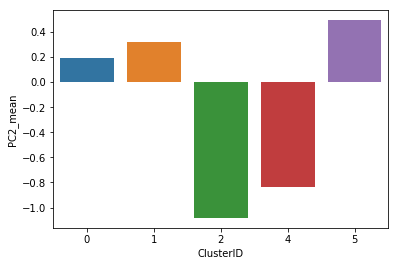

In [262]:
sns.barplot(x=df3.ClusterID, y=df3.PC2_mean)

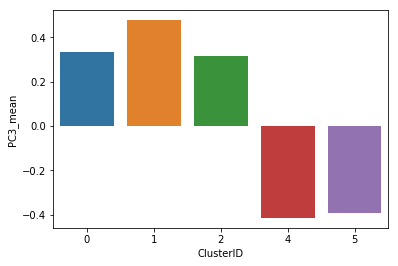

In [263]:
sns.barplot(x=df3.ClusterID, y=df3.PC3_mean)

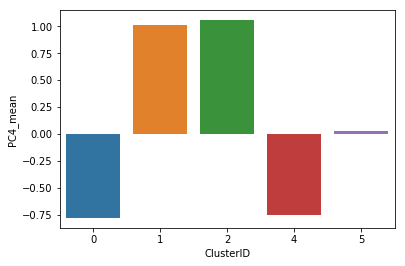

In [264]:
sns.barplot(x=df3.ClusterID, y=df3.PC4_mean)

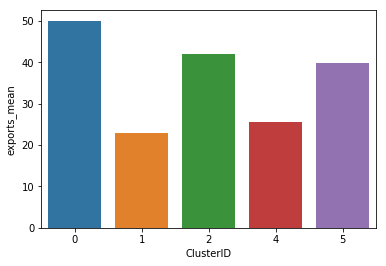

In [265]:
sns.barplot(x=df3.ClusterID, y=df3.exports_mean)

<hr>

## Heirarchical Clustering

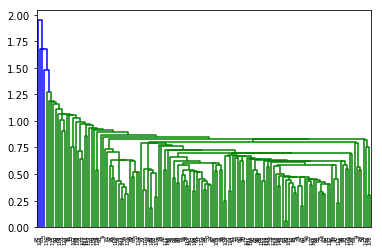

In [266]:
# heirarchical clustering
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

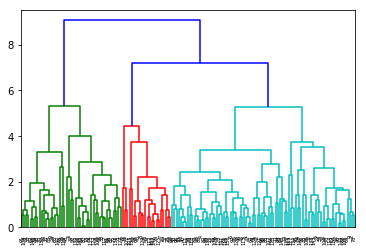

In [295]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [268]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
clusterCut.shape
clusterCut_df = pd.DataFrame(clusterCut)

In [269]:
clusterCut_df = clusterCut_df.reset_index()
clusterCut_df.shape

(149, 2)

In [270]:
outliers_df = outliers_df.reset_index()
outliers_df.shape

(149, 6)

In [271]:
country_hc = pd.concat([outliers_df, clusterCut_df], axis=1)
country_hc = country_hc.drop('index', 1)
country_hc.head()

,country,PC1,PC2,PC3,PC4,0
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,1


In [272]:
#country_hc = country_hc.drop('level_0', 1)
country_hc.columns = ["country", "PC1", "PC2", "PC3","PC4","ClusterID"]
country_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,1


In [273]:
df_country_clusterid3 = pd.merge(country_hc,countries_1,on='country',how='inner')
df_country_clusterid3.head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.428070,-0.586096,0.320090,-1.167681,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [274]:
#PC_km.PC4 = PC_km.PC4.dt.days

km_clusters_child_mort = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).gdpp.mean())

km_clusters_PC1 = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = 	pd.DataFrame(df_country_clusterid2.groupby(["ClusterID"]).PC4.mean())

In [275]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp,km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,116.165000,23.691000,6.658000,38.615000,1562.150000,8.408250,55.170000,5.642000,663.550000,-3.109356,0.429572,0.435962,1.082296
1,1,22.948780,38.669256,6.368537,44.115438,13075.853659,7.392244,73.229268,2.342195,7401.743902,0.184744,-0.283343,-0.037027,-0.672923
2,2,61.764000,44.152000,5.517200,53.876000,6145.600000,8.940800,63.608000,3.978800,2980.520000,-1.308202,0.777330,0.039969,-0.100072
3,3,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182,2.581300,-1.082748,0.313695,1.055989


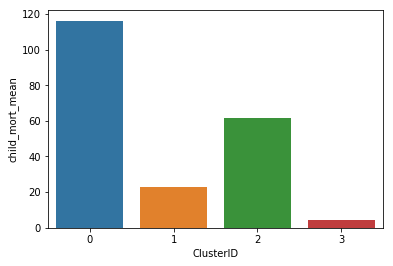

In [276]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

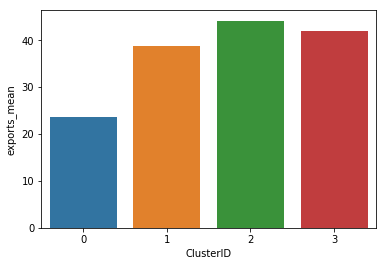

In [277]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.exports_mean)

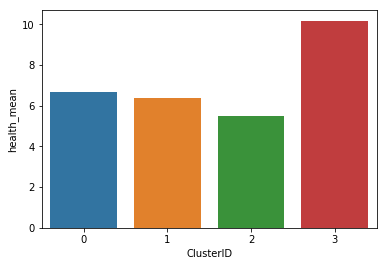

In [278]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.health_mean)

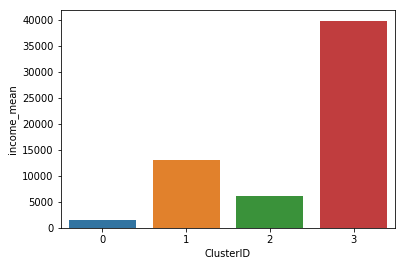

In [279]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.income_mean)

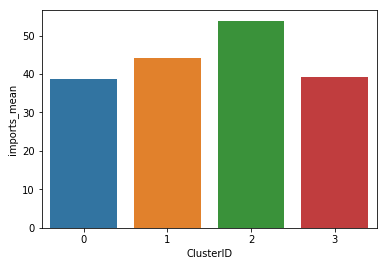

In [280]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.imports_mean)

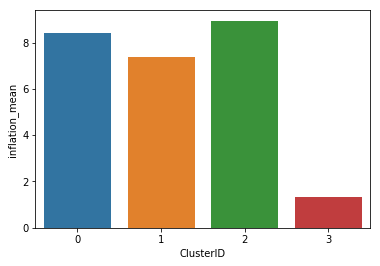

In [281]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

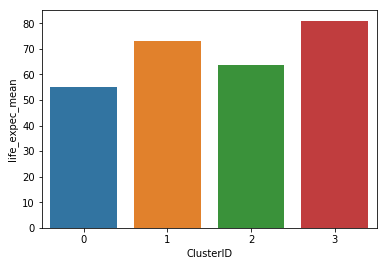

In [282]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

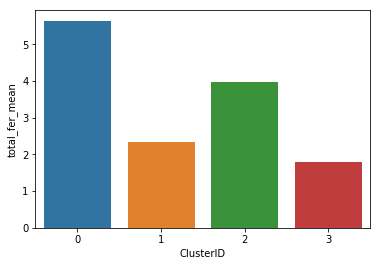

In [283]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

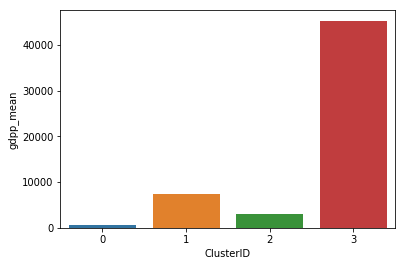

In [284]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

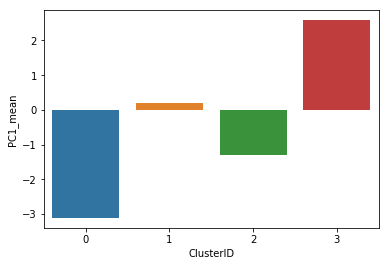

In [285]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PC1_mean)

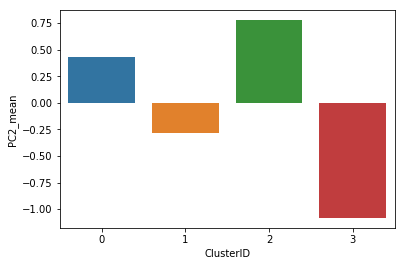

In [286]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PC2_mean)

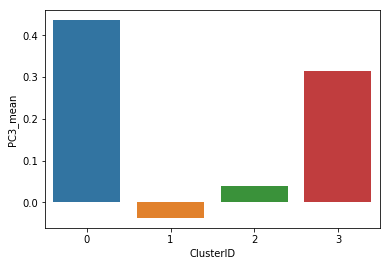

In [287]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PC3_mean)

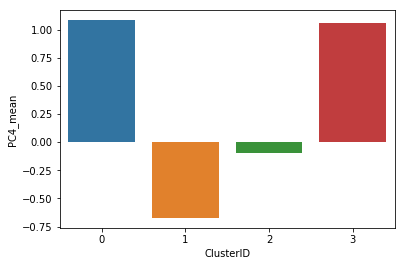

In [288]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PC4_mean)

In [296]:
df1 = df_country_clusterid2.loc[df_country_clusterid2['ClusterID'] == 0]
result = pd.DataFrame(df1.country)
result

,country
0,Afghanistan
17,Benin
24,Burkina Faso
25,Burundi
27,Cameroon
30,Central African Republic
31,Chad
36,"Congo, Dem. Rep."
39,Cote d'Ivoire
62,Guinea


## Conclusion

- We consider the countries in clusterid = 0.

- The above mentioned countries have low income, low GDPP and high child mortality rate.

- Hence the above mentioned countries are best for maximum fund investment.